In [1]:
import pandas as pd
import numpy as np

import torch
import fastai

from fastai.vision.all import *
from ipywidgets import widgets

import cv2

In [2]:
path = Path('../input/chest-xray-pneumonia')
#/kaggle/input/pnevmoniya

path.ls()

(#1) [Path('../input/chest-xray-pneumonia/chest_xray')]

In [3]:
def data_loader(data):
    transport = DataBlock(
        blocks = (ImageBlock, CategoryBlock),
        get_items = get_image_files,
        get_y = parent_label,
        item_tfms = Resize(224)
    )
    
    dls = transport.dataloaders(data)
    return dls

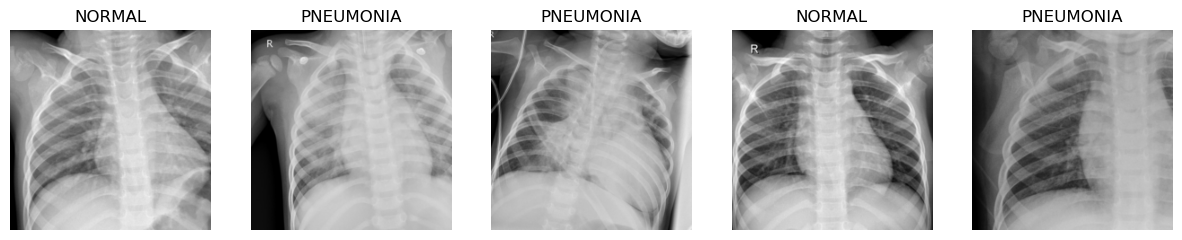

In [4]:
dls = data_loader(path)
dls.train.show_batch(max_n=5, nrows=1)

In [5]:
model = cnn_learner(dls, resnet152, metrics=accuracy)
model.fine_tune(10)

/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f

epoch,train_loss,valid_loss,accuracy,time
0,0.285805,0.200268,0.942784,05:24


epoch,train_loss,valid_loss,accuracy,time
0,0.099723,0.057646,0.979078,05:49
1,0.075093,0.130572,0.969257,05:51
2,0.062939,0.057910,0.980359,05:51
3,0.051957,0.024237,0.991887,05:52
4,0.040435,0.035082,0.986336,05:49
5,0.035704,0.021095,0.994876,05:50
6,0.014199,0.005825,0.998292,05:50
7,0.004839,0.003349,0.998292,05:50
8,0.002715,0.002976,0.998292,05:51
9,0.001021,0.001562,0.999146,05:49


In [6]:
df = pd.read_csv('../input/pnevmoniya/sample_solution.csv')
df.head()

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0


In [7]:
for i in range(0,624):
    label = df.iloc[i,0]
    img = PILImage.create(Path(f'../input/pnevmoniya/test/{label}'))
    #img = cv2.imread('../input/pnevmoniya/test/'+label)
    pred, _, prob = model.predict(img)
    df.iloc[i,1] = pred

In [8]:
df['labels'] = df['labels'].replace({'PNEUMONIA': 1, 'NORMAL': 0})
df.to_csv('submission_csv', index=False)

In [9]:
pd.read_csv("submission_csv")

,id,labels
0,test_img_10001.jpeg,1
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,1
4,test_img_10005.jpeg,0
...,...,...
619,test_img_10620.jpeg,1
620,test_img_10621.jpeg,0
621,test_img_10622.jpeg,1
622,test_img_10623.jpeg,0
